<a href="https://colab.research.google.com/github/annie-lu/hamlet_bot/blob/master/hamletbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from textblob import TextBlob
import re
import random, time, tweepy
import seaborn as sns
import numpy as np
import pandas
sns.set(style="whitegrid")

In [5]:
text = "sample_data/hamlet.txt"
print("Hamlet Character List: HAMLET, CLAUDIUS, GHOST, GERTRUDE, KING, QUEEN, \nPOLONIUS, LAERTES, OPHELIA, HORATIO, FORTINBRAS, VOLTEMAND, CORNELIUS, \nROSENCRANTZ, GUILDENSTERN, MARCELLUS, BARNARDO, FRANCISCO, OSRIC, REYNALDO")
play_character = input("Choose a Hamlet Character: ")
character_length = len(play_character)+2

Hamlet Character List: HAMLET, CLAUDIUS, GHOST, GERTRUDE, KING, QUEEN, 
POLONIUS, LAERTES, OPHELIA, HORATIO, FORTINBRAS, VOLTEMAND, CORNELIUS, 
ROSENCRANTZ, GUILDENSTERN, MARCELLUS, BARNARDO, FRANCISCO, OSRIC, REYNALDO
Choose a Hamlet Character: Hamlet


In [0]:
text = open(text).read() #entire text
lines = text.split('\n\n') #split text by separate speech
c_lines = ""
c_speech = pandas.DataFrame(columns=['Speech', 'Length','Polarity', 'Subjectivity'])
for i in lines: #going through each speech
  if i.find(play_character.upper()+".")==0:
    speech = i[character_length:]
    c_speech = c_speech.append({'Speech': speech, 'Length': len(speech.strip().split()), 'Polarity': TextBlob(speech).sentiment.polarity,'Subjectivity':TextBlob(speech).sentiment.subjectivity}, ignore_index=True)

words = text.split()
c_lines = c_speech.Speech.values

In [7]:
#distant reading analysis
print("Within the play, " + play_character + " speaks " + str(len(c_speech.index)) + " times.")
print("In total, " + play_character + " speaks "+ str(c_speech['Length'].sum())+" words.")
print("On average, " + play_character + " will speak for "+ str(c_speech['Length'].sum()//len(c_speech.index)) + " words without stopping.")
print("")
print( play_character + "'s shortest speech is "+str(c_speech.Length.min())+" words long")
print(c_speech[c_speech.Length.min() == c_speech.Length])
print("")
max_speech = c_speech[c_speech.Length.max() == c_speech.Length]
print(play_character + "'s longest speech is "+str(c_speech.Length.max())+" words long"+" with a polarity of "+str(max_speech.Polarity.values[0])+" and subjectivity of "+str(max_speech.Subjectivity.values[0])+".")
print(str(c_speech[c_speech.Length.max() == c_speech.Length].Speech.values[0]))

Within the play, Hamlet speaks 358 times.
In total, Hamlet speaks 10788 words.
On average, Hamlet will speak for 30 words without stopping.

Hamlet's shortest speech is 1 words long
        Speech Length  Polarity  Subjectivity
47       What?      1       0.0           0.0
49     Murder!      1       0.0           0.0
160   Nothing.      1       0.0           0.0
252      Good.      1       0.7           0.6
278       Why?      1       0.0           0.0
286      This?      1       0.0           0.0
344       One.      1       0.0           0.0
345  Judgment.      1       0.0           0.0

Hamlet's longest speech is 459 words long with a polarity of 0.08288261217948717 and subjectivity of 0.5657692307692308.
Ay, so, God b’ wi’ ye. Now I am alone. O what a rogue and
peasant slave am I! Is it not monstrous that this player here, But in a
fiction, in a dream of passion, Could force his soul so to his own
conceit That from her working all his visage wan’d; Tears in his eyes,
distraction in

The average polarity of Hamlet's speech is 0.10997860590391342
The median polarity of Hamlet's speech is 0.0


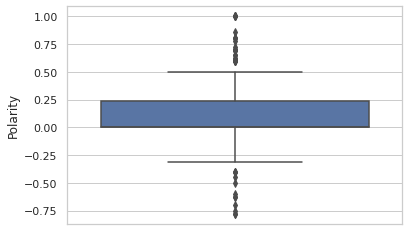

In [8]:
print("The average polarity of "+play_character+"'s speech is " + str(np.mean(c_speech.Polarity)))
print("The median polarity of "+play_character+"'s speech is " + str(np.median(c_speech.Polarity)))
sns.boxplot(y=c_speech.Polarity)

positive_polarity = (c_speech[c_speech.Polarity>0.15].Speech.values).tolist()
no_polarity = (c_speech[abs(c_speech.Polarity) <= 0.15].Speech.values).tolist()
negative_polarity  = (c_speech[c_speech.Polarity<-0.15].Speech.values).tolist()

The average subjectivity of Hamlet's speech is 0.3164459413240059
The median subjectivity of Hamlet's speech is 0.3164459413240057


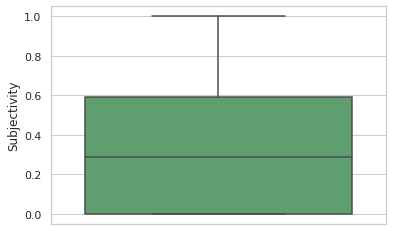

In [9]:
print("The average subjectivity of "+play_character+"'s speech is " + str(np.mean(c_speech.Subjectivity)))
print("The median subjectivity of "+play_character+"'s speech is " + str(np.average(c_speech.Subjectivity)))
sns.boxplot(y=c_speech.Subjectivity, palette=["g"])

no_subjectivity = (c_speech[c_speech.Subjectivity==0].Speech.values).tolist()
medium_subjectivity = (c_speech[abs(0.2-c_speech.Subjectivity) < 0.2].Speech.values).tolist()
high_subjectivity = (c_speech[c_speech.Subjectivity>=0.4].Speech.values).tolist()

In [10]:
start_words =  re.findall('([A-Z][a-z]{0,})', "".join(c_lines))
print("There are "+str(len(set(start_words)))+" different start words.")
common_start_words = set([x for x in start_words if start_words.count(x) > 1])
print(str(len(common_start_words))+" start words occur more than once.")
list(common_start_words)[:10]

There are 382 different start words.
162 start words occur more than once.


['There',
 'Sblood',
 'One',
 'Hyperion',
 'Into',
 'Hold',
 'Follow',
 'Which',
 'Am',
 'By']

In [0]:
def add_to_model(model, n, seq):
    # make a copy of seq and append None to the end
    seq = list(seq[:]) + [None]
    for i in range(len(seq)-n):
        # tuple because we're using it as a dict key!
        gram = tuple(seq[i:i+n])
        next_item = seq[i+n]            
        if gram not in model:
            model[gram] = []
        model[gram].append(next_item)

def markov_model(n, seq):
    model = {}
    add_to_model(model, n, seq)
    return model

In [12]:
subjectivity_choices = {1:c_lines,2:no_subjectivity ,3:medium_subjectivity,4:high_subjectivity}
print("1: all subjectivity")
print("2: no subjectivity")
print("3: medium subjectivity")
print("4: high subjectivity")
s_choice = int(input("Choose subjectivity of text: ") )

print("")

polarity_choices = {1:c_lines, 2:no_polarity, 3:positive_polarity, 4:negative_polarity}
print("1: all polarity")
print("2: no polarity")
print("3: positive polarity")
print("4: negative polarity")
p_choice = int(input("Choose polarity of text: ") )

chosen_lines = list(set(subjectivity_choices[s_choice]).intersection(polarity_choices[p_choice]))

print("")
print("You have chosen "+ str(len(chosen_lines))+ " lines.")

chosen_lines=" ".join(chosen_lines)
c_markov_model = markov_model(2, chosen_lines.split())

1: all subjectivity
2: no subjectivity
3: medium subjectivity
4: high subjectivity
Choose subjectivity of text: 1

1: all polarity
2: no polarity
3: positive polarity
4: negative polarity
Choose polarity of text: 1

You have chosen 358 lines.


In [0]:
import random
def gen_from_model(n, model, start=None, max_gen=100):
    if start is None:
        start = random.choice(list([i for i in model.keys() if i[0] in common_start_words])) #choose a common start phrases
    output = list(start)
    for i in range(max_gen):
        start = tuple(output[-n:])
        next_item = random.choice(model[start])
        if next_item is None:
            break
        else:
            output.append(next_item)
    return output

In [0]:
def imitate_character():
  generated_words = gen_from_model(2, c_markov_model, None, 18) #bigram approach, with a total of 18 words max
  strange = ' '.join(generated_words)
  #find the last punctuation in the text
  period = strange.rfind('.')
  exclamation = strange.rfind('!')
  question = strange.rfind('?')
  s_bracket = strange.rfind(']')
  end = max(period, max(max(exclamation,question),s_bracket))
  return strange[:end+1] #return all the complete sentences

In [27]:
CONSUMER_KEY = 'PLACE YOUR OWN CONSUMER KEY HERE'
CONSUMER_SECRET = 'PLACE YOUR OWN CONSUMER SECRET HERE'
ACCESS_KEY = 'PLACE YOUR OWN ACCESS KEY HERE'
ACCESS_SECRET = 'PLACE YOUR OWN ACCESS SECRET HERE'
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_KEY, ACCESS_SECRET)
api = tweepy.API(auth)
i = 1
possible_tweets=[]
while i<=5: #give the user 5 options to tweet out
  postthis = imitate_character()
  if len(postthis)>0 and len(postthis) <= 140:
    print(str(i)+": "+postthis)
    print(TextBlob(postthis).sentiment)
    print("")
    possible_tweets.append(postthis)
    i+=1
print("Type 6 to cancel")
print("")
choice = int(input("Choose one of these to post(#): ") )
if choice>0 and choice<6: #tweet if they choose a valid number
  api.update_status(status=possible_tweets[choice-1])

1: Get thee to a bawd than the mutinies in the eye, Nor the soles of her favours?
Sentiment(polarity=0.0, subjectivity=0.0)

2: My father, in his rage, Or in th’incestuous pleasure of his grief did put me Into a tow’ring passion.
Sentiment(polarity=-0.8, subjectivity=0.2)

3: The cat will mew, and dog will have his fine pate full of fine dirt?
Sentiment(polarity=0.39444444444444443, subjectivity=0.5166666666666667)

4: French swords, their assigns, and three liberal conceited carriages: that’s the French bet against the Danish.
Sentiment(polarity=0.0, subjectivity=0.0)

5: Being a thing immortal as itself? It waves me still. Go on, I’ll follow thee.
Sentiment(polarity=0.0, subjectivity=0.0)

Type 6 to cancel

Choose one of these to post(#): 6
